# Wigner Function: Harmonic Oscillator

The onde-dimensional harmonic oscillator can be solved to give the following eigenfunctions
$$
    \psi_{n}(x) = \frac{(a^2\pi)^{-1/4}}{\sqrt{2^{n}n!}}H_{n}(x/a)\exp\left(-\frac{1}{2}\left(\frac{x}{a}\right)^2\right),
$$
with $H_{n}$ the n-th Hermite polynomial and $a^2:=\hbar/m\omega$.

Considering a pure state $\psi_{n}$, we compute it's Wigner function $W(x,p) = \frac{1}{2\pi\hbar}\int dy\, e^{-ipy/\hbar}\psi\left(x+\frac{y}{2}\right)\psi^{*}\left(x-\frac{y}{2}\right)$ which yields
$$
    W_{n}(x,p) = \frac{(-1)^n}{\pi\hbar}\cdot\exp(-(x/a)^2-\left(\frac{ap}{\hbar}\right)^2)L_{n}\left(2\left[\left(\frac{ap}{\hbar}\right)^2+\left(\frac{x}{a}\right)^2\right]\right),
$$
where $L_{n}$ is the n-th Laguerre polynomial. 

The six dimensional Wigner function (phase space has three space and momentum coordinates) for a pure state is defined as
$$
    W(\vec{x},\vec{p}) = \frac{1}{(2\pi\hbar)^3}\int d^{3}y\, \exp\left(-i\frac{\vec{p}\cdot\vec{y}}{\hbar}\right)\psi\left(\vec{x}+\frac{\vec{y}}{2}\right)\psi^{*}\left(\vec{x}-\frac{\vec{y}}{2}\right).
$$

In our case, we'd like to know the Wigner function for an eigenstate of the harmonic oscillator. Assuming that the frequency is the same in all three directions, the eigenfunctions are separable, i.e, $\psi(\vec{x}) = \psi_{n_x}(x)\psi_{n_y}(y)\psi_{n_z}(z)$. Thus, it suffices to be able to compute de onde dimensional Wigner function.
***

In [1]:
using Polynomials, SpecialPolynomials
using LaTeXStrings
using Plots
using Statistics
pgfplotsx()

┌ Info: Precompiling SpecialPolynomials [a25cea48-d430-424a-8ee7-0d3ad3742e9e]
└ @ Base loading.jl:1317
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1317
┌ Info: Precompiling PGFPlotsX [8314cec4-20b6-5062-9cdb-752b83310925]
└ @ Base loading.jl:1317
┌ Info: Precompiling Latexify [23fbe1c1-3f47-55db-b15f-69d7ec21a316]
└ @ Base loading.jl:1317


Plots.PGFPlotsXBackend()

In [146]:
"""
    Laguerre_func(x, n)
Returns the value of the n-th Laguerre polynomial L_n evaluated at x.
"""
function Laguerre_func(x, n)
    l = zeros(Int8, n + 1)
    l[n + 1] = 1
    p = Laguerre{0}(l)
    return p(x)
end

Laguerre_func

In [147]:
# Plot the Laguerre polynomials
function plt_Laguerre(xi, xf, nxs, n)
    xs = range(xi,stop = xf, length = nxs)
    us = Float64[Laguerre_func(x, n) for x in xs]
    plt = plot(xs, us, lw = 2.8, color = RGB{Float64}(0.8,0.2,0.3), xlabel = L"x", ylabel = L"L_{n}(x)", label = L"n= "*" $n",title = "Laguerre Polynomials",
    alpha = 0.8,legend=:bottomleft,xguidefontsize=15,yguidefontsize=15,legendfontsize=12,xtickfontsize=13,ytickfontsize=13)
end

plt_Laguerre (generic function with 1 method)

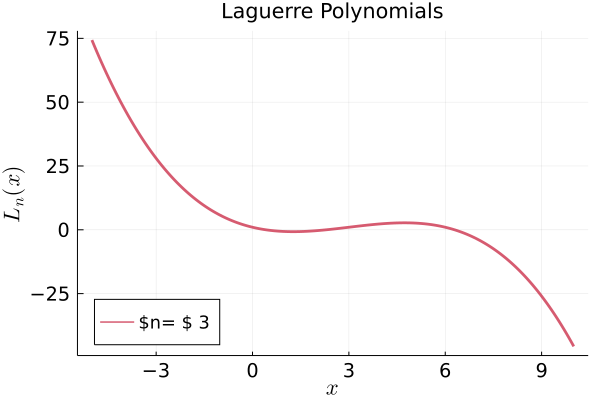

In [148]:
plt_Laguerre(-5, 10, 200, 3)

***
To proceed, we define new dimensionless variables $u := x/a $ and $v := (ap/\hbar)$ such that 
$$
    \hbar W_{n}(u,v) = \frac{(-1)^n}{\pi}\cdot\exp(-u^{2}-v^{2})L_{n}\left(2[v^2+u^2]\right).
$$


In [174]:
"""
    W_one_dim(u, v, n)
Returns the value of the one dimensional Wigner function for the n-th eigenstate of the harmonic oscillator.
"""
function W_1dim(u, v, n)
    t1 = ((-1) ^ n) / π
    t2 =  u ^ 2 + v ^ 2
    t3 = exp(-t2)
    t4 = Laguerre_func(2 * t2, n)
    return t1 * t3 * t4
end

W_1dim

In [175]:
function plt_W_1dim(n, ulim, vlim, npoints)
    us = range(-ulim, stop = ulim, length = npoints)
    vs = range(-vlim, stop = vlim, length = npoints)
    vals = zeros(Float64, (npoints, npoints))
    for i in 1:length(us)
        for j in 1:length(vs)
            vals[j, i] = W_1dim(us[i], vs[j], n)
        end
    end
            
    surface(us, vs, vals, xlabel = L"u", ylabel = L"v", zlabel = L"\hbar W_{n}(u,v)", title = L"n="*" $n")
end

plt_W_1dim (generic function with 1 method)

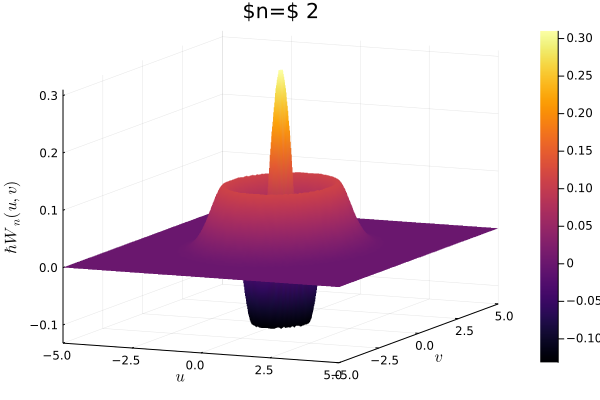

In [159]:
plt_W_1dim(2, 5, 5, 100)

We now try to reproduce the analytical resuts by numerically integrating the expression for the Wigner function. To do so, we write
$$
    (a^2\pi)^{1/4}\psi_{n}(u) = \Psi_{n}(u) = \frac{1}{\sqrt{2^{n}n!}}H_{n}(u)e^{-u^2/2}.
$$

In [176]:
"""
    Hermite_func(x, n)
Returns the value of the n-th Hermite polynomial H_n evaluated at x.
"""
function Hermite_func(x, n)
    l = zeros(Int8, n + 1)
    l[n + 1] = 1
    p = Hermite(l)
    #@show(p)
    return p(x)
end

Hermite_func

In [46]:
# Plot the Hermite polynomials
function plt_Hermite(xi, xf, nxs, n)
    xs = range(xi,stop = xf, length = nxs)
    us = Float64[Hermite_func(x, n) for x in xs]
    plt = plot(xs, us, lw = 2.8, color = RGB{Float64}(0.8,0.2,0.3), xlabel = L"x", ylabel = L"H_{n}(x)", label = L"n= "*" $n",title = "Hermite Polynomials",
    alpha = 0.8,legend=:bottomleft,xguidefontsize=15,yguidefontsize=15,legendfontsize=12,xtickfontsize=13,ytickfontsize=13)
end

plt_Hermite (generic function with 1 method)

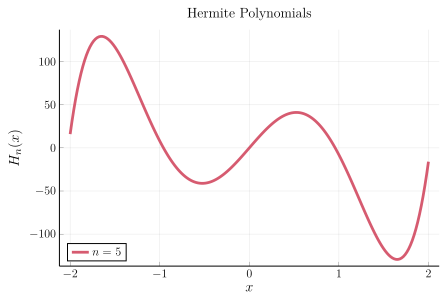

In [51]:
plt_Hermite(-2, 2, 200, 5)

In [52]:
function ψ_n(u, n)
    t1 = sqrt( (2 ^n) * factorial(n) )
    t2 = 1 / t1 
    t3 = (u ^ 2) / 2
    t4 = Hermite_func(u, n) * exp(-t3)
    return t2 * t4
end

ψ_n (generic function with 1 method)

In [55]:
# Plot the HO eigenfunctions
function plt_ψ_n(xi, xf, nxs, n)
    xs = range(xi,stop = xf, length = nxs)
    us = Float64[ψ_n(x, n) for x in xs]
    plt = plot(xs, us, lw = 2.8, color = RGB{Float64}(0.8,0.2,0.3), xlabel = L"u", ylabel = L"\Psi_{n}(u)", label = L"n= "*" $n",
    title = "Harmonic Oscillator Eigenfunctions", alpha = 0.8,legend=:bottomleft,
    xguidefontsize=15,yguidefontsize=15,legendfontsize=12,xtickfontsize=13,ytickfontsize=13)
end

plt_ψ_n (generic function with 1 method)

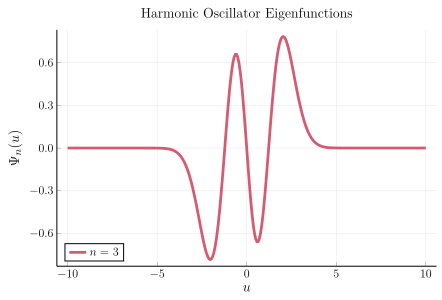

In [59]:
plt_ψ_n(-10, 10, 300, 3)

Now that we have a Julia function for the HO eigenfunctions we proceed and try to compute it's correpsonding Wigner function via numerical integration.

In [160]:
function quad_trap(f,a, b, N) # This function implements the trapezoidal rule 
    h = (b - a) / N
    int = h * ( f(a) + f(b) ) / 2
    for k in 1:N-1
        xk = (h * k) + a
        int = int + h * f(xk)
    end
    return int
end


quad_trap (generic function with 1 method)

For the one dimensional harmonic oscillator, the corresponding n-th Wigner function is given by
$$
    W_{n}(x,p) = \frac{1}{2\pi\hbar}\int_{-\infty}^{\infty} dy\, \exp\left(-i\frac{py}{\hbar}\right)\psi_{n}\left(x+\frac{y}{2}\right)\psi_{n}^{*}\left(x-\frac{y}{2}\right).
$$

In [161]:
function integrand_wigner(y, x, p, n)
    t1 = exp(-(p*y) * im) 
    t2 = ψ_n(x + (y / 2), n)
    t3 = conj(ψ_n(x - (y / 2), n))
    return t1 * t2 * t3
end

integrand_wigner (generic function with 2 methods)

In [168]:
function Wigner_n_trap(x, p, n)
    t1 = 1 / (2 * π)
    lim = Int(100 * (n + 1))
    t2 = quad_trap(y -> integrand_wigner(y, x, p, n), -lim, lim, Int(1000 * (n + 1)))
    return real(t1 * t2)
end

Wigner_n_trap (generic function with 1 method)

In [166]:
Wigner_n_trap(1e-5, 1e-5, 1)

-0.5641895832092427

In [169]:
function plt_Wigner_n_trap(n, ulim, vlim, npoints)
    us = range(-ulim, stop = ulim, length = npoints)
    vs = range(-vlim, stop = vlim, length = npoints)
    vals = zeros(Float64, (npoints, npoints))
    for i in 1:length(us)
        for j in 1:length(vs)
            vals[j, i] = Wigner_n_trap(us[i], vs[j], n)
        end
    end
            
    surface(us, vs, vals, xlabel = L"u", ylabel = L"v", zlabel = L"\hbar W_{n}(u,v)", title = "$n")
end

plt_Wigner_n_trap (generic function with 1 method)

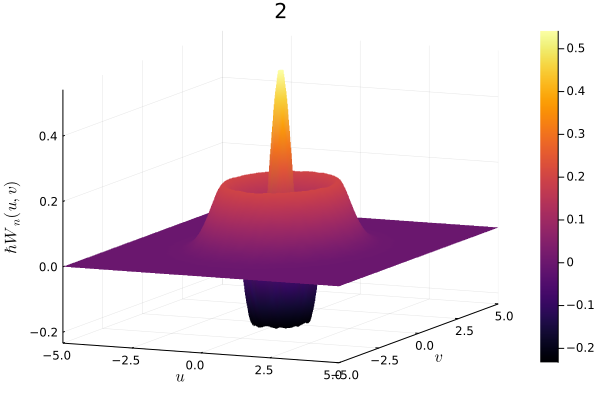

In [173]:
gr()
plt_Wigner_n_trap(2, -5, 5, 80)

In [183]:
using QuadGK

In [189]:
function Wigner_n_QuadGK(x, p, n, tol) # This function uses the Gauss–Kronrod quadrature formula,  which implements adaptative integration
    t1 = 1 / (2 * π)
    I,est = quadgk(y -> integrand_wigner(y, x, p, n), -Inf, Inf, rtol = tol)
    return real(t1 * I)
end

Wigner_n_QuadGK (generic function with 1 method)

In [190]:
Wigner_n_QuadGK(1e-5, 1e-5, 1, 1e-6)

-0.5641895832092322

In [191]:
function plt_Wigner_n_QuadGK(n, ulim, vlim, npoints, tol)
    us = range(-ulim, stop = ulim, length = npoints)
    vs = range(-vlim, stop = vlim, length = npoints)
    vals = zeros(Float64, (npoints, npoints))
    for i in 1:length(us)
        for j in 1:length(vs)
            vals[j, i] = Wigner_n_QuadGK(us[i], vs[j], n, tol)
        end
    end
            
    surface(us, vs, vals, xlabel = L"u", ylabel = L"v", zlabel = L"\hbar W_{n}(u,v)", title = "$n")
end

plt_Wigner_n_QuadGK (generic function with 1 method)

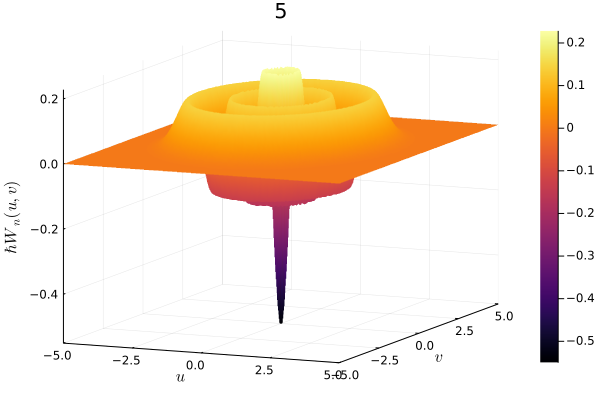

In [195]:
plt_Wigner_n_QuadGK(5, 5, 5, 150, 1e-6)

***
***
This is all well and good, however, generically we cannot expect to have an analytic expression for the wave function $\psi$ which can be evaluated at any given point. Thusly, we're in need of other quadrature algorithms to treat the cases where all we have is an array of values on pre-determined points. In this case, we may use [Trapz.jl](https://github.com/francescoalemanno/Trapz.jl) or [NumericalIntegration.jl)](https://github.com/dextorious/NumericalIntegration.jl).

Need to check [QuadGK](https://juliamath.github.io/QuadGK.jl/stable/)

In [7]:
# Quick example with NumericalIntegration.jl
using NumericalIntegration
# Multidimensional integration

xs = collect(-π/2 : π/1000 : π/2)
ys = sin.(xs)
Z = [i*j for i = xs, j = ys]
NumericalIntegration.integrate((xs,ys), Z)

1.857080032185651e-17

In [9]:
# Exemple with Trapz.jl
using Trapz

vx = range(0,1,length=100)
vy = range(0,2,length=200)
vz = range(0,3,length=300)
M = [x^2+y^2+z^2 for x = vx, y = vy, z = vz]
I = trapz((vx,vy,vz),M)
print("result: ",I)

result: 28.000303707970264